In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)

In [3]:
df = read.csv("../data/steps_slope_by_gender_age_bmi_for_walkability__user_level__20160404.csv") 

In [4]:
df$Gender = factor(df$Gender, levels = c("male", "female"))
df$group = factor(df$group, levels = c('all', 'Age=[0, 30)', 'Age=[30, 50)', 'Age=[50, inf)', 'BMI=[18.5, 25)', 'BMI=[25, 30)', 'BMI=[30, inf)'))

In [5]:
df$group_continuous = as.numeric(df$group)
# add offsets incrementally
df$group_continuous[df$group_continuous>1] = df$group_continuous[df$group_continuous>1] + .5
df$group_continuous[df$group_continuous>5] = df$group_continuous[df$group_continuous>5] + .5

breaks = sort(unique(df$group_continuous))
limits = as.array(breaks)
limits = c(limits,9) # add cushion

labels = c("all", "Age 0-29", "Age 30-49", "Age 50+", "normal BMI", "overweight", "obese")

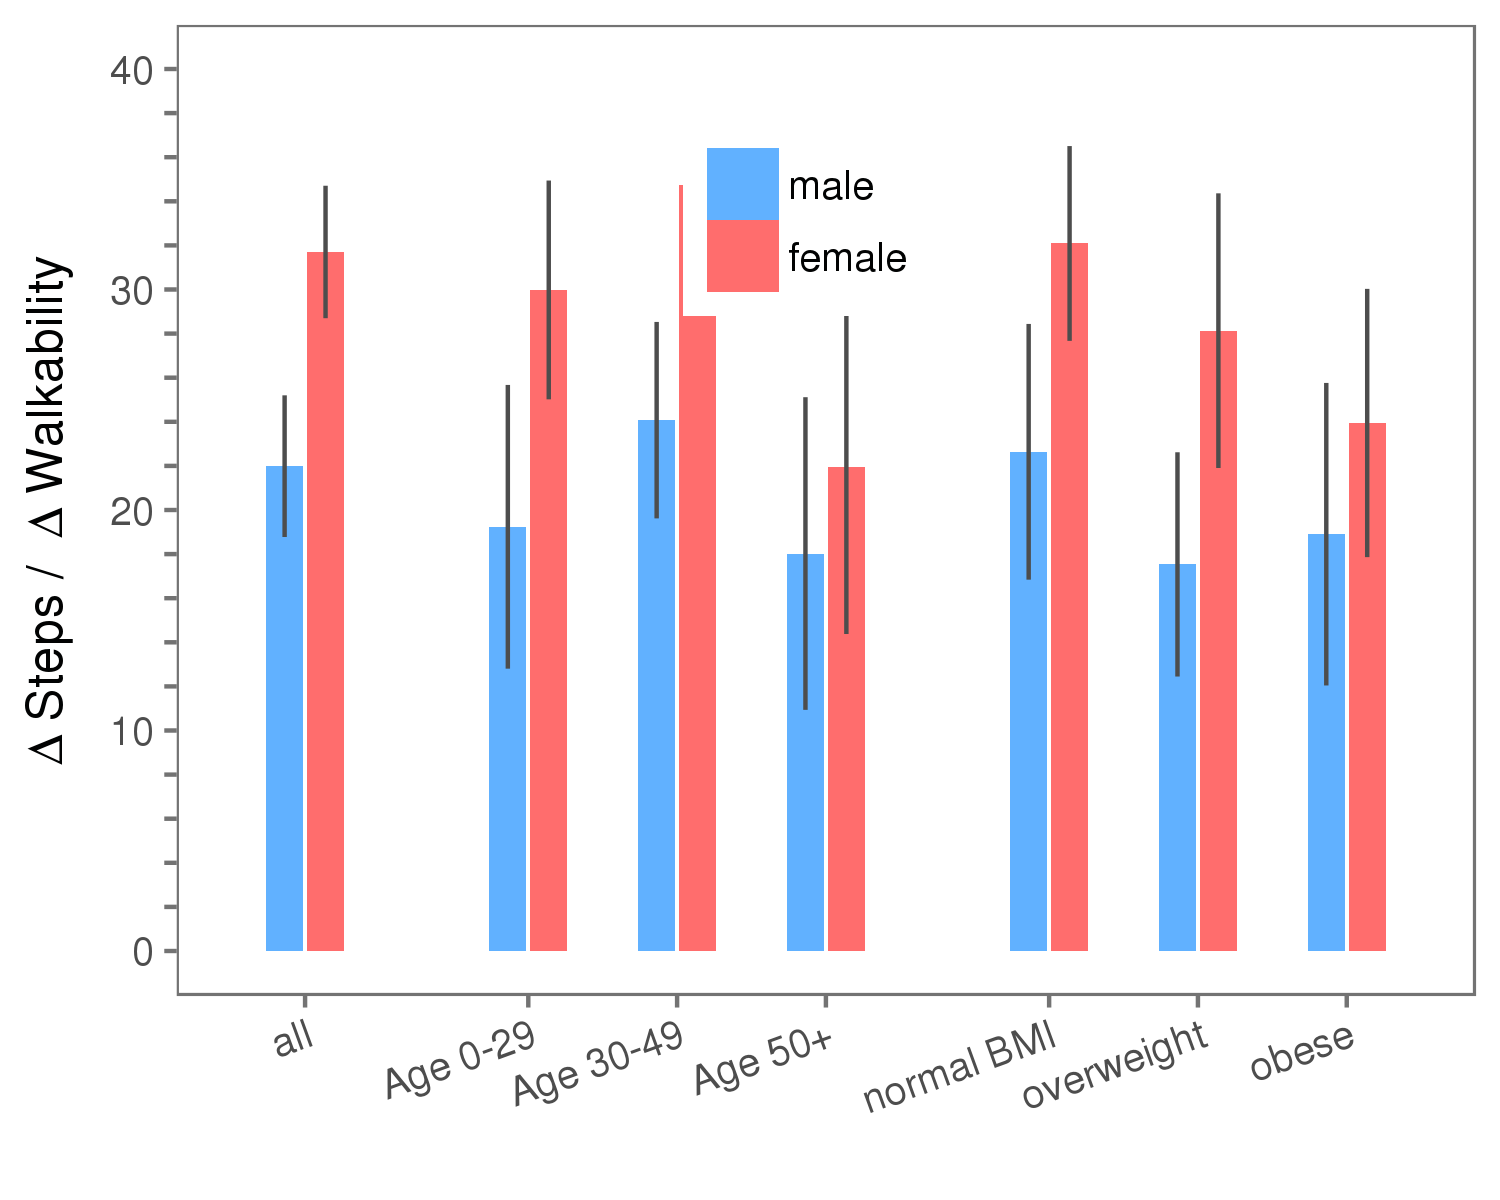

In [11]:
p <- ggplot(df, aes(x=group_continuous, y=slope, fill=Gender))
p <- p + geom_bar(stat = "identity", width = 0.5, position = position_dodge(width = 0.55), size=0.0, alpha=.7)
p <- p + geom_errorbar(aes(ymin = slope_lower95, ymax = slope_upper95, width = 0.0),
                      position = position_dodge(width = 0.55), size=.5, color="gray30")
p <- p + labs(colour = "")
p <- p + labs(shape = "")
p <- p + labs(linetype = "")
p <- p + labs(fill = "")
p <- p + scale_color_manual(values=c("dodgerblue", "firebrick3"))
p <- p + scale_fill_manual(values=c("dodgerblue", "firebrick1"))
p <- p + xlab("") + ylab(expression(Delta ~ "Steps / " ~ Delta ~ "Walkability"))

p <- p + scale_x_discrete(breaks = breaks,
                     limits = limits,
                     labels = labels)
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + theme(axis.text.x = element_text(angle = 20, hjust = 1))
p <- p + theme(legend.justification=c(0,0), legend.position=c(0.39,0.70))

# xticks
yticks = seq(0,40,by=2) 
ylabels = rep("", length(yticks))
ylabels[seq(1, length(yticks), 5)] = sprintf("%d", yticks[seq(1, length(yticks), 5)])
p <- p + scale_y_continuous(breaks=yticks, labels=ylabels, limits=c(0,40))

p

ggsave(filename="../output/fig3d.pdf", plot=p, width=4, height=3)